# Training on 2 classes (V5 dataset)

In this experiment, we trained on 2 classes, `all_off` (5), where all the communication is off, and `all_on` (6), where everything is on.

We tested in following conditions:

Number of test cases: 68 (34 from each class)

Locations
- Bathroom
- DormRoom1
- DormRoom2
- DormRoom3
- DormRoom4
- DormRoom5
- DormRoom6
- Kitchen1
- Kitchen2
- Kitchen3
- LivigRoom2
- LivingRoom1
- Park
- Restaurant

Communication modules (internal producers of electromagnetic emissions)
- wifi
- bluetooth
- mobile antenna

Traffic on

In [1]:
import os
import pandas as pd
import glob
import json
version = "v5"
dataset_path = f"../data/processed/"
filename = f"{version}-2_stages-full_statistical_with_window.csv"

In [2]:
import csv
import pandas as pd

df = pd.read_csv(f"{dataset_path}/{filename}")
df


,Unnamed: 0,name,location,device_id,label,count,X_UnCal_mean,X_UnCal_std,X_UnCal_min,X_UnCal_25%,...,Z_Bias,Bias_Intensity,Accuracy,fourier_mean,fourier_std,fourier_min,fourier_25%,fourier_50%,fourier_75%,fourier_max
0,0,LATERNAWithTraffic2_000,Restaurant,029a77f196804217,5,1000.0,32.37654,6.159823,7.62,34.020000,...,-0.900000,38.607984,1,2.988454,17.570596,0.123887,0.194630,0.222709,0.520518,124.607659
1,1,LATERNAWithTraffic2_001,Restaurant,029a77f196804217,5,1000.0,34.36920,0.447752,33.12,34.079998,...,-0.900000,38.607984,1,2.348688,15.367627,0.016290,0.058241,0.103125,0.267914,108.834361
2,2,LATERNAWithTraffic2_002,Restaurant,029a77f196804217,5,1000.0,34.31886,0.433351,33.12,34.020000,...,-0.900000,38.607984,1,2.359108,15.384415,0.014653,0.064039,0.105815,0.269367,108.960546
3,3,LATERNAWithTraffic2_003,Restaurant,029a77f196804217,5,1000.0,34.28556,0.438147,33.12,33.960000,...,-0.900000,38.607984,1,2.372398,15.407814,0.016998,0.078269,0.114059,0.280265,109.135575
4,4,LATERNAWithTraffic2_004,Restaurant,029a77f196804217,5,1000.0,34.26084,0.449255,32.76,33.960000,...,-0.900000,38.607984,1,2.373860,15.417774,0.017775,0.068422,0.111261,0.305817,109.206232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,671,spelaMilenkosRoomTrafficTable3_005,DormRoom3,e08d976ac75c011e,6,1000.0,-3.87912,0.388812,-5.10,-4.140000,...,-96.299995,112.363976,1,7.393496,51.012672,0.011610,0.075226,0.124811,0.266794,360.891651
672,672,spelaMilenkosRoomTrafficTable3_006,DormRoom3,e08d976ac75c011e,6,1000.0,-3.87624,0.380569,-5.10,-4.140000,...,-96.299995,112.363976,1,7.396722,51.024236,0.014966,0.072868,0.122709,0.299157,360.975023
673,673,spelaMilenkosRoomTrafficTable3_007,DormRoom3,e08d976ac75c011e,6,1000.0,-3.87408,0.391281,-5.10,-4.140000,...,-96.299995,112.363976,1,7.394965,50.993828,0.013631,0.068642,0.124743,0.327989,360.762581
674,674,spelaMilenkosRoomTrafficTable3_008,DormRoom3,e08d976ac75c011e,6,1000.0,-3.85620,0.388581,-5.10,-4.140000,...,-96.299995,112.363976,1,7.392048,50.954352,0.015366,0.071047,0.114159,0.348142,360.485913


In [3]:
df.columns

Index(['Unnamed: 0', 'name', 'location', 'device_id', 'label', 'count',
       'X_UnCal_mean', 'X_UnCal_std', 'X_UnCal_min', 'X_UnCal_25%',
       'X_UnCal_50%', 'X_UnCal_75%', 'X_UnCal_max', 'Y_UnCal_mean',
       'Y_UnCal_std', 'Y_UnCal_min', 'Y_UnCal_25%', 'Y_UnCal_50%',
       'Y_UnCal_75%', 'Y_UnCal_max', 'Z_UnCal_mean', 'Z_UnCal_std',
       'Z_UnCal_min', 'Z_UnCal_25%', 'Z_UnCal_50%', 'Z_UnCal_75%',
       'Z_UnCal_max', 'Intensity_mean', 'Intensity_std', 'Intensity_min',
       'Intensity_25%', 'Intensity_50%', 'Intensity_75%', 'Intensity_max',
       'X_Bias', 'Y_Bias', 'Z_Bias', 'Bias_Intensity', 'Accuracy',
       'fourier_mean', 'fourier_std', 'fourier_min', 'fourier_25%',
       'fourier_50%', 'fourier_75%', 'fourier_max'],
      dtype='object')

In [4]:
list(set([name[:-3] for name in df['name'].to_list()]))

['spelaMilenkosRoomTrafficTable1_',
 'NadasKitchenWithTrafficOrient3_',
 'PiXmilenkosRoomTrafficTable1_',
 'milenkosRoomWithTrafficDifferentOrentationWithPousesInRuns2_',
 'milenkosRoomWithTrafficDifferentOrentationWithPousesInRuns_',
 'milenkosRoomTrafficBed1_',
 'spelaMilenkosKitchenTrafficTable4_',
 'milenkosRoomTrafficTable_',
 'NadasLivingRoomWithTrafficOrient3_',
 'NadasKitchenWithTraffic_',
 'NadasLivingRoomWithTrafficOrient2_',
 'spelaMilenkosKitchenTrafficTable2_',
 'milenkosRoomTrafficTable2_',
 'PiXmilenkosRoomTrafficTable2_',
 'milenkosRoomTrafficBed2_',
 'LATERNAWithTraffic2_',
 'PiXmilenkosRoomTrafficTable7_',
 'milenkosRoomEithTrafficDifferentOrentationWithPousesInRuns3_',
 'PiXmilenkosRoomTrafficTable4_',
 'PiXmilenkosRoomTrafficTable5_',
 'LATERNAWithTruffic_',
 'PiXmilenkosRoomTrafficTable3_',
 'milenkosRoomTrafficBed3_',
 'MihasLivingRoom_',
 'NadasLivingRoomWithTraffic_',
 'PiXmilenkosRoomTrafficTable6_',
 'NadasBathroomWithTrafficOrient1_',
 'spelaMilenkosRoomTraff

In [5]:
list(set(df['device_id'].to_list()))

['029a77f196804217',
 'e08d976ac75c011e',
 '03575768cc23b2df',
 '4aaf95a621ccf092']

# General feature selection
- corelation between feature and label
- 

In [6]:
correlation = df.iloc[:, 6:].apply(lambda x: df['label'].corr(x, method="pearson")).abs().sort_values(ascending=False)
correlation

Y_UnCal_max       0.112520
fourier_75%       0.111725
Y_UnCal_75%       0.108621
Y_UnCal_mean      0.107608
Y_UnCal_50%       0.107584
Y_UnCal_25%       0.106881
Y_UnCal_min       0.103246
Intensity_min     0.101404
Intensity_25%     0.098206
Intensity_mean    0.097730
Intensity_50%     0.097213
Intensity_75%     0.096490
Intensity_max     0.096338
fourier_std       0.096161
fourier_max       0.096118
fourier_mean      0.092875
fourier_50%       0.087614
Intensity_std     0.076841
Y_UnCal_std       0.076505
fourier_25%       0.072649
X_UnCal_min       0.068176
Z_UnCal_max       0.066485
Z_UnCal_75%       0.063183
fourier_min       0.062552
Z_UnCal_mean      0.062117
Z_UnCal_25%       0.060995
Z_UnCal_50%       0.060371
X_UnCal_25%       0.060274
X_UnCal_mean      0.060221
Z_UnCal_min       0.060053
X_UnCal_max       0.059731
X_UnCal_75%       0.058986
X_UnCal_50%       0.058929
Z_UnCal_std       0.043800
X_UnCal_std       0.032822
X_Bias            0.017937
Y_Bias            0.010273
Z

In [7]:
# select features with correlation greater then 0.1
selection_general = correlation[correlation > 0.05].index
df[selection_general]

,Y_UnCal_max,fourier_75%,Y_UnCal_75%,Y_UnCal_mean,Y_UnCal_50%,Y_UnCal_25%,Y_UnCal_min,Intensity_min,Intensity_25%,Intensity_mean,...,fourier_min,Z_UnCal_mean,Z_UnCal_25%,Z_UnCal_50%,X_UnCal_25%,X_UnCal_mean,Z_UnCal_min,X_UnCal_max,X_UnCal_75%,X_UnCal_50%
0,7.860000,0.520518,-33.420000,-30.45228,-33.840000,-34.200000,-35.399998,31.474618,53.825048,52.437204,...,0.123887,-25.286160,-25.260000,-24.779999,34.020000,32.37654,-34.860000,35.76,34.739998,34.38
1,-32.280000,0.267914,-33.540000,-33.79596,-33.780000,-34.079998,-35.040000,51.812839,53.987715,54.237281,...,0.016290,-24.854340,-25.199999,-24.900000,34.079998,34.36920,-26.220000,35.76,34.680000,34.38
2,-32.700000,0.269367,-33.600000,-33.89034,-33.899998,-34.140000,-35.340000,51.991826,54.041050,54.284260,...,0.014653,-24.896820,-25.320000,-24.960000,34.020000,34.31886,-26.279999,35.64,34.620000,34.32
3,-32.700000,0.280265,-33.660000,-33.97206,-33.960000,-34.260000,-35.520000,51.325572,54.070436,54.337133,...,0.016998,-24.947040,-25.320000,-25.019999,33.960000,34.28556,-26.340000,35.52,34.559998,34.26
4,-32.219997,0.305817,-33.660000,-33.96462,-33.960000,-34.260000,-35.520000,51.325572,54.087761,54.349825,...,0.017775,-25.020060,-25.380000,-25.080000,33.960000,34.26084,-26.400000,35.52,34.559998,34.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,14.219999,0.266794,13.259999,13.00236,13.020000,12.780000,11.820000,178.609277,179.738320,180.053431,...,0.011610,-179.540637,-179.819990,-179.580000,-4.140000,-3.87912,-180.900000,-2.64,-3.660000,-3.90
672,14.160000,0.299157,13.259999,13.01154,13.020000,12.780000,11.820000,178.304202,179.730158,180.039145,...,0.014966,-179.525757,-179.879990,-179.519990,-4.140000,-3.87624,-180.720000,-2.64,-3.660000,-3.90
673,14.160000,0.327989,13.259999,13.01706,13.020000,12.780000,12.059999,178.304202,179.658130,179.967078,...,0.013631,-179.453097,-179.774997,-179.459990,-4.140000,-3.87408,-180.720000,-2.70,-3.600000,-3.84
674,14.219999,0.348142,13.259999,13.00824,13.020000,12.719999,11.940000,178.537741,179.608622,179.923292,...,0.015366,-179.410197,-179.700000,-179.400000,-4.140000,-3.85620,-181.200000,-2.76,-3.600000,-3.84


- apparently we need feature selection tailored to every phone / location

# One phone (Pixel, 03575768cc23b2df), one location, different rotations

In [8]:
dataset = 'PiXmilenkosRoomTrafficTable'
df_pixel_dorm = df[df['name'].str.contains(dataset)]
df_pixel_dorm

,Unnamed: 0,name,location,device_id,label,count,X_UnCal_mean,X_UnCal_std,X_UnCal_min,X_UnCal_25%,...,Z_Bias,Bias_Intensity,Accuracy,fourier_mean,fourier_std,fourier_min,fourier_25%,fourier_50%,fourier_75%,fourier_max
74,74,PiXmilenkosRoomTrafficTable1_000,DormRoom2,03575768cc23b2df,5,1000.0,-1.616073,1.481408,-13.297999,-2.366800,...,-28.653944,54.960808,1,3.839093,24.134021,0.195812,0.323566,0.388414,0.473740,171.075840
75,75,PiXmilenkosRoomTrafficTable1_001,DormRoom2,03575768cc23b2df,5,1000.0,-1.440210,1.128453,-7.417600,-2.138050,...,-28.653944,54.960808,1,3.797462,23.973361,0.236980,0.319277,0.398427,0.465315,169.922407
76,76,PiXmilenkosRoomTrafficTable1_002,DormRoom2,03575768cc23b2df,5,1000.0,-1.346563,1.051113,-4.697000,-2.052650,...,-28.653944,54.960808,1,3.726634,23.892441,0.240594,0.297922,0.327597,0.384072,169.292040
77,77,PiXmilenkosRoomTrafficTable1_003,DormRoom2,03575768cc23b2df,5,1000.0,-1.282208,1.052316,-4.428600,-2.028250,...,-28.653944,54.960808,1,3.722813,23.882508,0.185653,0.294875,0.346501,0.382938,169.219517
78,78,PiXmilenkosRoomTrafficTable1_004,DormRoom2,03575768cc23b2df,5,1000.0,-1.345721,1.150642,-6.771000,-2.049600,...,-28.653944,54.960808,1,3.727229,23.894307,0.159398,0.288825,0.351736,0.396753,169.305562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,483,PiXmilenkosRoomTrafficTable7_006,DormRoom2,03575768cc23b2df,6,1000.0,-25.072403,0.764905,-29.084799,-25.498000,...,-37.247314,65.262127,1,1.498495,9.204857,0.102664,0.160848,0.187893,0.227684,65.283685
484,484,PiXmilenkosRoomTrafficTable7_007,DormRoom2,03575768cc23b2df,6,1000.0,-26.061530,1.563489,-30.317000,-27.620800,...,-37.247314,65.262127,1,1.560170,9.504054,0.134887,0.166468,0.193715,0.242913,67.417242
485,485,PiXmilenkosRoomTrafficTable7_008,DormRoom2,03575768cc23b2df,6,1000.0,-26.162619,1.526563,-32.464200,-27.633000,...,-37.247314,65.262127,1,1.576963,9.521007,0.111854,0.152295,0.205495,0.285424,67.549861
486,486,PiXmilenkosRoomTrafficTable7_009,DormRoom2,03575768cc23b2df,6,1000.0,-25.198368,0.803402,-32.464200,-25.595600,...,-37.247314,65.262127,1,1.520721,9.251726,0.118287,0.146333,0.183104,0.252648,65.628832


In [9]:
correlation_pixel_dorm = df_pixel_dorm.iloc[:, 6:].apply(lambda x: df_pixel_dorm['label'].corr(x, method="pearson")).abs().sort_values(ascending=False)
correlation_pixel_dorm

fourier_50%       0.328099
fourier_25%       0.324922
fourier_min       0.311024
fourier_75%       0.305893
X_UnCal_50%       0.210633
X_UnCal_75%       0.207831
X_UnCal_max       0.202905
X_UnCal_mean      0.201601
X_UnCal_25%       0.198021
X_UnCal_min       0.154332
X_Bias            0.124964
Bias_Intensity    0.124964
Z_Bias            0.124964
Y_Bias            0.124964
Intensity_min     0.084302
Z_UnCal_50%       0.082753
Z_UnCal_75%       0.079646
Z_UnCal_min       0.075815
Intensity_std     0.075381
Z_UnCal_mean      0.073559
Z_UnCal_25%       0.071604
Intensity_mean    0.050494
Intensity_25%     0.050226
Intensity_50%     0.047683
Y_UnCal_std       0.040853
fourier_std       0.039765
fourier_max       0.038758
Intensity_75%     0.037441
Intensity_max     0.036480
Z_UnCal_max       0.025670
Y_UnCal_min       0.020367
Y_UnCal_50%       0.019441
Y_UnCal_75%       0.018099
Y_UnCal_mean      0.017386
Y_UnCal_25%       0.017333
fourier_mean      0.014297
Y_UnCal_max       0.007552
Z

In [10]:
# select features with correlation greater then 0.3
selection_dorm = correlation_pixel_dorm[correlation_pixel_dorm > 0.30].index
df_pixel_dorm[selection_dorm]

,fourier_50%,fourier_25%,fourier_min,fourier_75%
74,0.388414,0.323566,0.195812,0.473740
75,0.398427,0.319277,0.236980,0.465315
76,0.327597,0.297922,0.240594,0.384072
77,0.346501,0.294875,0.185653,0.382938
78,0.351736,0.288825,0.159398,0.396753
...,...,...,...,...
483,0.187893,0.160848,0.102664,0.227684
484,0.193715,0.166468,0.134887,0.242913
485,0.205495,0.152295,0.111854,0.285424
486,0.183104,0.146333,0.118287,0.252648


In [11]:
 
test_case = 'PiXmilenkosRoomTrafficTable4'
test = df_pixel_dorm[df_pixel_dorm['name'].str.contains(test_case)]
train = df_pixel_dorm[~df_pixel_dorm['name'].str.contains(test_case)]
test

,Unnamed: 0,name,location,device_id,label,count,X_UnCal_mean,X_UnCal_std,X_UnCal_min,X_UnCal_25%,...,Z_Bias,Bias_Intensity,Accuracy,fourier_mean,fourier_std,fourier_min,fourier_25%,fourier_50%,fourier_75%,fourier_max
104,104,PiXmilenkosRoomTrafficTable4_000,DormRoom2,03575768cc23b2df,5,1000.0,6.963455,1.354192,0.780800,6.218950,...,-28.653944,54.960808,1,3.884454,24.389826,0.231377,0.333277,0.382096,0.476914,172.892642
105,105,PiXmilenkosRoomTrafficTable4_001,DormRoom2,03575768cc23b2df,5,1000.0,7.237674,1.111636,1.024800,6.490400,...,-28.653944,54.960808,1,3.768230,24.200279,0.205120,0.298619,0.335326,0.385389,171.466734
106,106,PiXmilenkosRoomTrafficTable4_002,DormRoom2,03575768cc23b2df,5,1000.0,7.237992,1.073566,2.379000,6.514800,...,-28.653944,54.960808,1,3.772658,24.223183,0.234858,0.290508,0.332499,0.392258,171.629922
107,107,PiXmilenkosRoomTrafficTable4_003,DormRoom2,03575768cc23b2df,5,1000.0,7.265686,1.120496,2.379000,6.551400,...,-28.653944,54.960808,1,3.770395,24.221619,0.228469,0.289361,0.339296,0.381239,171.616762
108,108,PiXmilenkosRoomTrafficTable4_004,DormRoom2,03575768cc23b2df,5,1000.0,7.266759,1.100196,2.208200,6.588000,...,-28.653944,54.960808,1,3.793258,24.220415,0.193317,0.306233,0.363039,0.417696,171.631112
109,109,PiXmilenkosRoomTrafficTable4_005,DormRoom2,03575768cc23b2df,5,1000.0,7.161632,1.261178,0.671000,6.536150,...,-28.653944,54.960808,1,3.886021,24.459378,0.221249,0.343665,0.388406,0.438797,173.374839
110,110,PiXmilenkosRoomTrafficTable4_006,DormRoom2,03575768cc23b2df,5,1000.0,7.183897,1.258897,0.671000,6.551400,...,-28.653944,54.960808,1,3.857127,24.481825,0.242741,0.314389,0.347082,0.391267,173.501530
111,111,PiXmilenkosRoomTrafficTable4_007,DormRoom2,03575768cc23b2df,5,1000.0,7.298491,1.065079,3.818600,6.606300,...,-28.653944,54.960808,1,3.770542,24.287211,0.216390,0.297478,0.331749,0.374855,172.071746
112,112,PiXmilenkosRoomTrafficTable4_008,DormRoom2,03575768cc23b2df,5,1000.0,7.323355,1.085171,2.964600,6.612400,...,-28.653944,54.960808,1,3.801684,24.299754,0.213891,0.317505,0.354085,0.402159,172.189697
113,113,PiXmilenkosRoomTrafficTable4_009,DormRoom2,03575768cc23b2df,5,1000.0,7.295405,1.151670,2.488800,6.600200,...,-28.653944,54.960808,1,3.823876,24.315932,0.251642,0.350482,0.371831,0.416243,172.324041


In [12]:
y_test = test['label'].to_numpy()
X_test = test[selection_dorm].to_numpy()
y_train = train['label'].to_numpy()
X_train = train[selection_dorm].to_numpy()


## SVM

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm

print(y_train.shape)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred))

classes_real = ["all_off", "all_on"]
classes_pred = ["all_off_predicted", "all_on_predicted"]
pd.DataFrame(confusion_matrix(y_test, y_pred), classes_real, classes_pred)

(128,)
0.65


,all_off_predicted,all_on_predicted
all_off,10,0
all_on,7,3


## RF

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred))

classes_real = ["all_off", "all_on"]
classes_pred = ["all_off_predicted", "all_on_predicted"]
pd.DataFrame(confusion_matrix(y_test, y_pred), classes_real, classes_pred)

0.65


,all_off_predicted,all_on_predicted
all_off,8,2
all_on,5,5


# One phone (Pixel, 03575768cc23b2df), different locations
- test on one location
- train on all other locations


In [15]:
device_id = '03575768cc23b2df'
df_pixel = df[df['device_id'] == device_id]
df_pixel

,Unnamed: 0,name,location,device_id,label,count,X_UnCal_mean,X_UnCal_std,X_UnCal_min,X_UnCal_25%,...,Z_Bias,Bias_Intensity,Accuracy,fourier_mean,fourier_std,fourier_min,fourier_25%,fourier_50%,fourier_75%,fourier_max
74,74,PiXmilenkosRoomTrafficTable1_000,DormRoom2,03575768cc23b2df,5,1000.0,-1.616073,1.481408,-13.297999,-2.366800,...,-28.653944,54.960808,1,3.839093,24.134021,0.195812,0.323566,0.388414,0.473740,171.075840
75,75,PiXmilenkosRoomTrafficTable1_001,DormRoom2,03575768cc23b2df,5,1000.0,-1.440210,1.128453,-7.417600,-2.138050,...,-28.653944,54.960808,1,3.797462,23.973361,0.236980,0.319277,0.398427,0.465315,169.922407
76,76,PiXmilenkosRoomTrafficTable1_002,DormRoom2,03575768cc23b2df,5,1000.0,-1.346563,1.051113,-4.697000,-2.052650,...,-28.653944,54.960808,1,3.726634,23.892441,0.240594,0.297922,0.327597,0.384072,169.292040
77,77,PiXmilenkosRoomTrafficTable1_003,DormRoom2,03575768cc23b2df,5,1000.0,-1.282208,1.052316,-4.428600,-2.028250,...,-28.653944,54.960808,1,3.722813,23.882508,0.185653,0.294875,0.346501,0.382938,169.219517
78,78,PiXmilenkosRoomTrafficTable1_004,DormRoom2,03575768cc23b2df,5,1000.0,-1.345721,1.150642,-6.771000,-2.049600,...,-28.653944,54.960808,1,3.727229,23.894307,0.159398,0.288825,0.351736,0.396753,169.305562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,573,milenkosRoomTrafficTable_005,DormRoom2,03575768cc23b2df,6,1000.0,18.407494,0.883179,12.956400,17.934000,...,-28.653944,54.960808,1,3.912348,25.335759,0.211502,0.283305,0.323165,0.376317,179.479723
574,574,milenkosRoomTrafficTable_006,DormRoom2,03575768cc23b2df,6,1000.0,18.670514,0.783783,14.652200,18.214600,...,-28.653944,54.960808,1,3.875543,25.301397,0.184757,0.254022,0.301300,0.336249,179.204882
575,575,milenkosRoomTrafficTable_007,DormRoom2,03575768cc23b2df,6,1000.0,18.577050,0.926018,14.737599,18.153599,...,-28.653944,54.960808,1,4.001066,25.355300,0.179577,0.325835,0.395968,0.470806,179.701202
576,576,milenkosRoomTrafficTable_008,DormRoom2,03575768cc23b2df,6,1000.0,18.387279,1.147467,12.663600,17.958399,...,-28.653944,54.960808,1,4.064183,25.388414,0.298097,0.383568,0.442667,0.543145,179.993822


In [16]:
correlation_pixel = df_pixel.iloc[:, 6:].apply(lambda x: df_pixel['label'].corr(x, method="pearson")).abs().sort_values(ascending=False)
correlation_pixel

fourier_50%       0.332267
fourier_25%       0.315435
fourier_75%       0.305924
fourier_min       0.287311
X_UnCal_50%       0.253862
X_UnCal_75%       0.250608
X_UnCal_max       0.249772
X_UnCal_mean      0.245590
X_UnCal_25%       0.242705
X_UnCal_min       0.192490
Bias_Intensity    0.104152
X_Bias            0.104152
Y_Bias            0.104152
Z_Bias            0.104152
Intensity_std     0.072529
Y_UnCal_max       0.071715
Y_UnCal_mean      0.061200
Y_UnCal_25%       0.061117
Y_UnCal_75%       0.060720
Y_UnCal_50%       0.059487
Y_UnCal_min       0.055738
Intensity_min     0.050871
Z_UnCal_50%       0.049925
Z_UnCal_min       0.049038
Z_UnCal_75%       0.046741
fourier_mean      0.046668
Z_UnCal_mean      0.041290
Z_UnCal_25%       0.039607
Y_UnCal_std       0.027896
Intensity_25%     0.017880
Intensity_mean    0.017632
Intensity_50%     0.015502
Intensity_max     0.007038
Z_UnCal_max       0.006349
fourier_std       0.006267
Intensity_75%     0.005709
Z_UnCal_std       0.005292
f

In [17]:
selection_pixel = correlation_pixel[correlation_pixel > 0.3].index
df_pixel[selection_pixel]

,fourier_50%,fourier_25%,fourier_75%
74,0.388414,0.323566,0.473740
75,0.398427,0.319277,0.465315
76,0.327597,0.297922,0.384072
77,0.346501,0.294875,0.382938
78,0.351736,0.288825,0.396753
...,...,...,...
573,0.323165,0.283305,0.376317
574,0.301300,0.254022,0.336249
575,0.395968,0.325835,0.470806
576,0.442667,0.383568,0.543145


In [18]:
# test_case = 'milenkosRoomTrafficTable'
test_case = 'PiXmilenkosRoomTrafficTable'
test = df[df['name'].str.contains(test_case)]
train = df[~df['name'].str.contains(test_case)]

y_test = test['label'].to_numpy()
X_test = test[selection_pixel].to_numpy()
y_train = train['label'].to_numpy()
X_train = train[selection_pixel].to_numpy()


## SVM

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm

print(y_train.shape)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred))

classes_real = ["all_off", "all_on"]
classes_pred = ["all_off_predicted", "all_on_predicted"]
pd.DataFrame(confusion_matrix(y_test, y_pred), classes_real, classes_pred)

(528,)
0.7094594594594594


,all_off_predicted,all_on_predicted
all_off,58,16
all_on,27,47


## RF

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred))

classes_real = ["all_off", "all_on"]
classes_pred = ["all_off_predicted", "all_on_predicted"]
pd.DataFrame(confusion_matrix(y_test, y_pred), classes_real, classes_pred)

0.668918918918919


,all_off_predicted,all_on_predicted
all_off,51,23
all_on,26,48


# Different phones

In [21]:
df['Pixel6'] = (df['device_id'] == "03575768cc23b2df").replace({True: 1, False: 0})
df['RedmiNote8Pro'] = (df['device_id'] == "4aaf95a621ccf092").replace({True: 1, False: 0})
df['GalaxyA51'] = (df['device_id'] == "029a77f196804217").replace({True: 1, False: 0})
df['GalaxyS6'] = (df['device_id'] == "e08d976ac75c011e").replace({True: 1, False: 0})
df

,Unnamed: 0,name,location,device_id,label,count,X_UnCal_mean,X_UnCal_std,X_UnCal_min,X_UnCal_25%,...,fourier_std,fourier_min,fourier_25%,fourier_50%,fourier_75%,fourier_max,Pixel6,RedmiNote8Pro,GalaxyA51,GalaxyS6
0,0,LATERNAWithTraffic2_000,Restaurant,029a77f196804217,5,1000.0,32.37654,6.159823,7.62,34.020000,...,17.570596,0.123887,0.194630,0.222709,0.520518,124.607659,0,0,1,0
1,1,LATERNAWithTraffic2_001,Restaurant,029a77f196804217,5,1000.0,34.36920,0.447752,33.12,34.079998,...,15.367627,0.016290,0.058241,0.103125,0.267914,108.834361,0,0,1,0
2,2,LATERNAWithTraffic2_002,Restaurant,029a77f196804217,5,1000.0,34.31886,0.433351,33.12,34.020000,...,15.384415,0.014653,0.064039,0.105815,0.269367,108.960546,0,0,1,0
3,3,LATERNAWithTraffic2_003,Restaurant,029a77f196804217,5,1000.0,34.28556,0.438147,33.12,33.960000,...,15.407814,0.016998,0.078269,0.114059,0.280265,109.135575,0,0,1,0
4,4,LATERNAWithTraffic2_004,Restaurant,029a77f196804217,5,1000.0,34.26084,0.449255,32.76,33.960000,...,15.417774,0.017775,0.068422,0.111261,0.305817,109.206232,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,671,spelaMilenkosRoomTrafficTable3_005,DormRoom3,e08d976ac75c011e,6,1000.0,-3.87912,0.388812,-5.10,-4.140000,...,51.012672,0.011610,0.075226,0.124811,0.266794,360.891651,0,0,0,1
672,672,spelaMilenkosRoomTrafficTable3_006,DormRoom3,e08d976ac75c011e,6,1000.0,-3.87624,0.380569,-5.10,-4.140000,...,51.024236,0.014966,0.072868,0.122709,0.299157,360.975023,0,0,0,1
673,673,spelaMilenkosRoomTrafficTable3_007,DormRoom3,e08d976ac75c011e,6,1000.0,-3.87408,0.391281,-5.10,-4.140000,...,50.993828,0.013631,0.068642,0.124743,0.327989,360.762581,0,0,0,1
674,674,spelaMilenkosRoomTrafficTable3_008,DormRoom3,e08d976ac75c011e,6,1000.0,-3.85620,0.388581,-5.10,-4.140000,...,50.954352,0.015366,0.071047,0.114159,0.348142,360.485913,0,0,0,1


In [22]:
correlation_all = df.iloc[:, 6:].apply(lambda x: df['label'].corr(x, method="pearson")).abs().sort_values(ascending=False)
correlation_all

Y_UnCal_max       0.112520
fourier_75%       0.111725
Y_UnCal_75%       0.108621
Y_UnCal_mean      0.107608
Y_UnCal_50%       0.107584
Y_UnCal_25%       0.106881
Y_UnCal_min       0.103246
Intensity_min     0.101404
Intensity_25%     0.098206
Intensity_mean    0.097730
Intensity_50%     0.097213
Intensity_75%     0.096490
Intensity_max     0.096338
fourier_std       0.096161
fourier_max       0.096118
fourier_mean      0.092875
fourier_50%       0.087614
Intensity_std     0.076841
Y_UnCal_std       0.076505
fourier_25%       0.072649
X_UnCal_min       0.068176
Z_UnCal_max       0.066485
Z_UnCal_75%       0.063183
fourier_min       0.062552
Z_UnCal_mean      0.062117
Z_UnCal_25%       0.060995
Z_UnCal_50%       0.060371
X_UnCal_25%       0.060274
X_UnCal_mean      0.060221
Z_UnCal_min       0.060053
X_UnCal_max       0.059731
X_UnCal_75%       0.058986
X_UnCal_50%       0.058929
Z_UnCal_std       0.043800
X_UnCal_std       0.032822
X_Bias            0.017937
RedmiNote8Pro     0.013870
Y

In [27]:
selection_all = ['fourier_50%','fourier_25%', 'fourier_75%', 'fourier_min', 'Pixel6', 'GalaxyS6', 'GalaxyA51', 'RedmiNote8Pro']
selection_best = ['fourier_50%','fourier_25%', 'fourier_75%', 'fourier_min']

In [31]:
test_case = 'NadasLivingRoomWithTraffic'
#test_case = 'PiXmilenkosRoomTrafficTable'
test = df[df['name'].str.contains(test_case)]
train = df[~df['name'].str.contains(test_case)]

y_test = test['label'].to_numpy()
X_test = test[selection_best].to_numpy()
y_train = train['label'].to_numpy()
X_train = train[selection_best].to_numpy()

## SVM

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm

print(y_train.shape)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred))

classes_real = ["all_off", "all_on"]
classes_pred = ["all_off_predicted", "all_on_predicted"]
pd.DataFrame(confusion_matrix(y_test, y_pred), classes_real, classes_pred)

(651,)
0.48


,all_off_predicted,all_on_predicted
all_off,12,0
all_on,13,0


## RF

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred))

classes_real = ["all_off", "all_on"]
classes_pred = ["all_off_predicted", "all_on_predicted"]
pd.DataFrame(confusion_matrix(y_test, y_pred), classes_real, classes_pred)

0.6


,all_off_predicted,all_on_predicted
all_off,12,0
all_on,10,3


# All phones, all locations averaging

In [46]:
selection_all = correlation_all[correlation_all > 0.1].index
selection_all

Index(['Y_UnCal_max', 'fourier_75%', 'Y_UnCal_75%', 'Y_UnCal_mean',
       'Y_UnCal_50%', 'Y_UnCal_25%', 'Y_UnCal_min', 'Intensity_min'],
      dtype='object')

In [50]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

df_test = df
selection = ['fourier_50%','fourier_25%', 'fourier_75%', 'fourier_min']#, 'fourier_max']
# selection = selection_all
results = []
for test_case in list(set([name[:-3] for name in df['name'].to_list()])):

    # test is one session, train the rest
    test = df[df['name'].str.contains(test_case)]
    train = df[~df['name'].str.contains(test_case)]

    y_test = test['label'].to_numpy()
    X_test = test[selection_best].to_numpy()
    y_train = train['label'].to_numpy()
    X_train = train[selection_best].to_numpy()

    # SVM
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_svm = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    # RF
    clf = RandomForestClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_rf = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    results_temp = [test_case, acc_svm, acc_rf]
    results.append(results_temp)
    print(results_temp)

results_all = pd.DataFrame(results, columns=['Test case', 'SVM', 'RF'])
results_all
    

['spelaMilenkosRoomTrafficTable1_', 0.5, 0.65]
['NadasKitchenWithTrafficOrient3_', 0.5, 0.75]
['PiXmilenkosRoomTrafficTable1_', 0.7, 0.7]
['milenkosRoomWithTrafficDifferentOrentationWithPousesInRuns2_', 0.5, 0.42857142857142855]
['milenkosRoomWithTrafficDifferentOrentationWithPousesInRuns_', 0.5, 0.42857142857142855]
['milenkosRoomTrafficBed1_', 0.5, 0.35714285714285715]
['spelaMilenkosKitchenTrafficTable4_', 0.5, 0.5]
['milenkosRoomTrafficTable_', 0.75, 0.75]
['NadasLivingRoomWithTrafficOrient3_', 0.5, 0.5]
['NadasKitchenWithTraffic_', 0.4444444444444444, 0.4444444444444444]
['NadasLivingRoomWithTrafficOrient2_', 0.4444444444444444, 0.5555555555555556]
['spelaMilenkosKitchenTrafficTable2_', 0.5, 0.75]
['milenkosRoomTrafficTable2_', 0.65, 0.75]
['PiXmilenkosRoomTrafficTable2_', 0.75, 0.75]
['milenkosRoomTrafficBed2_', 0.4642857142857143, 0.32142857142857145]
['LATERNAWithTraffic2_', 0.5357142857142857, 0.8214285714285714]
['PiXmilenkosRoomTrafficTable7_', 0.52, 0.56]
['milenkosRoomEith

,Test case,SVM,RF
0,spelaMilenkosRoomTrafficTable1_,0.500000,0.650000
1,NadasKitchenWithTrafficOrient3_,0.500000,0.750000
2,PiXmilenkosRoomTrafficTable1_,0.700000,0.700000
3,milenkosRoomWithTrafficDifferentOrentationWith...,0.500000,0.428571
4,milenkosRoomWithTrafficDifferentOrentationWith...,0.500000,0.428571
5,milenkosRoomTrafficBed1_,0.500000,0.357143
6,spelaMilenkosKitchenTrafficTable4_,0.500000,0.500000
7,milenkosRoomTrafficTable_,0.750000,0.750000
8,NadasLivingRoomWithTrafficOrient3_,0.500000,0.500000
9,NadasKitchenWithTraffic_,0.444444,0.444444


In [51]:
results_all.mean()

/tmp/ipykernel_61538/3344289172.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  results_all.mean()


SVM    0.538673
RF     0.567248
dtype: float64

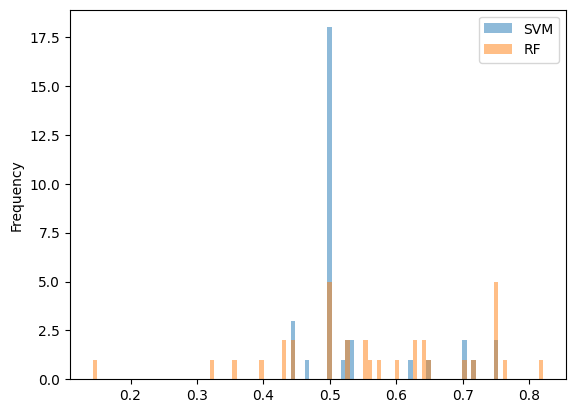

In [52]:
ax = results_all.plot.hist(bins=100, alpha=0.5)

# Pixel and Redmi Note 8 Pro, all locations, averaging
- both phones had some test cases in multiple orientations

In [124]:
#Pixel6
#RedmiNote8Pro
#GalaxyA51
#GalaxyS6

In [125]:
df_pixel_redmi = df[(df['Pixel6'] + df['RedmiNote8Pro']) == 1]

In [126]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

df_test = df_pixel_redmi
selection = ['fourier_50%','fourier_25%', 'fourier_75%', 'fourier_min']#, 'fourier_max']
# selection = selection_all
results = []
for test_case in list(set([name[:-3] for name in df_test['name'].to_list()])):

    # test is one session, train the rest
    test = df_test[df_test['name'].str.contains(test_case)]
    train = df_test[~df_test['name'].str.contains(test_case)]

    y_test = test['label'].to_numpy()
    X_test = test[selection_best].to_numpy()
    y_train = train['label'].to_numpy()
    X_train = train[selection_best].to_numpy()

    # SVM
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_svm = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    # RF
    clf = RandomForestClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_rf = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    results_temp = [test_case, acc_svm, acc_rf]
    results.append(results_temp)
    print(results_temp)

results_all = pd.DataFrame(results, columns=['Test case', 'SVM', 'RF'])
results_all
    

['MihasLivingRoom_', 0.5, 0.875]
['NadasKitchenWithTrafficOrient3_', 0.5, 0.875]
['PiXmilenkosRoomTrafficTable1_', 0.75, 0.7]
['milenkosRoomTrafficTable_', 0.7, 0.75]
['NadasLivingRoomWithTraffic_', 0.5, 0.625]
['PiXmilenkosRoomTrafficTable6_', 0.5238095238095238, 0.5238095238095238]
['NadasBathroomWithTrafficOrient1_', 0.5, 1.0]
['NadasLivingRoomWithTrafficOrient3_', 0.5, 0.875]
['PiXmilenkosRoomTrafficTable7_', 0.16, 0.52]
['NadasKitchenWithTraffic_', 0.4444444444444444, 0.8888888888888888]
['NadasLivingRoomWithTrafficOrient2_', 0.4444444444444444, 0.5555555555555556]
['NadasKitchenWithTrafficOrient2_', 0.4444444444444444, 0.7777777777777778]
['PiXmilenkosRoomTrafficTable2_', 0.7, 0.75]
['PiXmilenkosRoomTrafficTable4_', 0.7, 0.8]
['PiXmilenkosRoomTrafficTable5_', 0.6666666666666666, 0.7619047619047619]
['milenkosRoomTrafficTable2_', 0.65, 0.75]
['PiXmilenkosRoomTrafficTable3_', 0.6190476190476191, 0.6666666666666666]


,Test case,SVM,RF
0,MihasLivingRoom_,0.500000,0.875000
1,NadasKitchenWithTrafficOrient3_,0.500000,0.875000
2,PiXmilenkosRoomTrafficTable1_,0.750000,0.700000
3,milenkosRoomTrafficTable_,0.700000,0.750000
4,NadasLivingRoomWithTraffic_,0.500000,0.625000
5,PiXmilenkosRoomTrafficTable6_,0.523810,0.523810
6,NadasBathroomWithTrafficOrient1_,0.500000,1.000000
7,NadasLivingRoomWithTrafficOrient3_,0.500000,0.875000
8,PiXmilenkosRoomTrafficTable7_,0.160000,0.520000
9,NadasKitchenWithTraffic_,0.444444,0.888889


In [127]:
results_all.mean()

/tmp/ipykernel_61538/3344289172.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  results_all.mean()


SVM    0.547227
RF     0.746741
dtype: float64

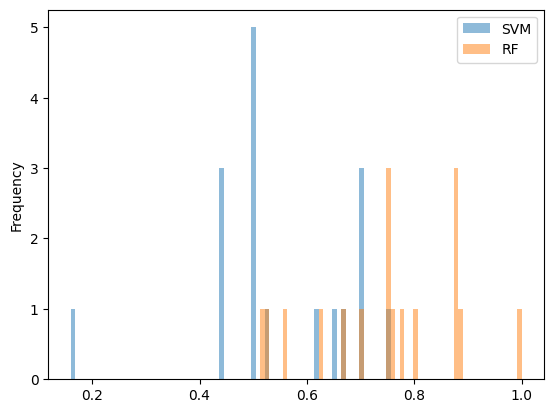

In [128]:
ax = results_all.plot.hist(bins=100, alpha=0.5)

# Pixel, all locations, averaging

In [129]:
#Pixel6
#RedmiNote8Pro
#GalaxyA51
#GalaxyS6

In [130]:
df_pixel = df[df['Pixel6'] == 1]

In [131]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

df_test = df_pixel
selection = ['fourier_50%','fourier_25%', 'fourier_75%', 'fourier_min']#, 'fourier_max']
# selection = selection_all
results = []
for test_case in list(set([name[:-3] for name in df_test['name'].to_list()])):

    # test is one session, train the rest
    test = df_test[df_test['name'].str.contains(test_case)]
    train = df_test[~df_test['name'].str.contains(test_case)]

    y_test = test['label'].to_numpy()
    X_test = test[selection_best].to_numpy()
    y_train = train['label'].to_numpy()
    X_train = train[selection_best].to_numpy()

    # SVM
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_svm = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    # RF
    clf = RandomForestClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_rf = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    results_temp = [test_case, acc_svm, acc_rf]
    results.append(results_temp)
    print(results_temp)

results_all = pd.DataFrame(results, columns=['Test case', 'SVM', 'RF'])
results_all
    

['PiXmilenkosRoomTrafficTable1_', 0.7, 0.7]
['milenkosRoomTrafficTable_', 0.75, 0.85]
['PiXmilenkosRoomTrafficTable6_', 0.38095238095238093, 0.47619047619047616]
['PiXmilenkosRoomTrafficTable7_', 0.16, 0.44]
['milenkosRoomTrafficTable2_', 0.7, 0.75]
['PiXmilenkosRoomTrafficTable2_', 0.75, 0.85]
['PiXmilenkosRoomTrafficTable4_', 0.7, 0.75]
['PiXmilenkosRoomTrafficTable5_', 0.7142857142857143, 0.7619047619047619]
['PiXmilenkosRoomTrafficTable3_', 0.6666666666666666, 0.6666666666666666]


,Test case,SVM,RF
0,PiXmilenkosRoomTrafficTable1_,0.700000,0.700000
1,milenkosRoomTrafficTable_,0.750000,0.850000
2,PiXmilenkosRoomTrafficTable6_,0.380952,0.476190
3,PiXmilenkosRoomTrafficTable7_,0.160000,0.440000
4,milenkosRoomTrafficTable2_,0.700000,0.750000
5,PiXmilenkosRoomTrafficTable2_,0.750000,0.850000
6,PiXmilenkosRoomTrafficTable4_,0.700000,0.750000
7,PiXmilenkosRoomTrafficTable5_,0.714286,0.761905
8,PiXmilenkosRoomTrafficTable3_,0.666667,0.666667


In [132]:
results_all.mean()

/tmp/ipykernel_61538/3344289172.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  results_all.mean()


SVM    0.613545
RF     0.693862
dtype: float64

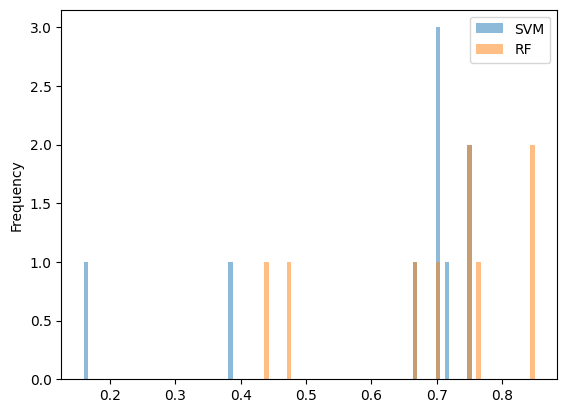

In [133]:
ax = results_all.plot.hist(bins=100, alpha=0.5)

# RedmiNote8Pro from pixel

In [134]:
#Pixel6
#RedmiNote8Pro
#GalaxyA51
#GalaxyS6

In [135]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

df_test = df
test_df = df_test[df_test['RedmiNote8Pro'] == 1]
train_df = df_test[df_test['Pixel6'] == 1]
selection = ['fourier_50%','fourier_25%', 'fourier_75%', 'fourier_min']#, 'fourier_max']
# selection = selection_all
results = []
for test_case in list(set([name[:-3] for name in test_df['name'].to_list()])):

    # test is one session, train the rest
    test = df_test[df_test['name'].str.contains(test_case)]
    train = train_df

    y_test = test['label'].to_numpy()
    X_test = test[selection_best].to_numpy()
    y_train = train['label'].to_numpy()
    X_train = train[selection_best].to_numpy()

    # SVM
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_svm = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    # RF
    clf = RandomForestClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_rf = sum([1 for i in range(len(y_pred)) if y_pred[i] == y_test[i]])/len(y_pred)

    results_temp = [test_case, acc_svm, acc_rf]
    results.append(results_temp)
    print(results_temp)

results_all = pd.DataFrame(results, columns=['Test case', 'SVM', 'RF'])
results_all
    

['MihasLivingRoom_', 0.5, 0.5]
['NadasKitchenWithTrafficOrient3_', 0.5, 0.5]
['NadasLivingRoomWithTraffic_', 0.5, 0.5]
['NadasBathroomWithTrafficOrient1_', 0.5, 0.5]
['NadasLivingRoomWithTrafficOrient3_', 0.5, 0.5]
['NadasKitchenWithTraffic_', 0.4444444444444444, 0.4444444444444444]
['NadasLivingRoomWithTrafficOrient2_', 0.4444444444444444, 0.4444444444444444]
['NadasKitchenWithTrafficOrient2_', 0.4444444444444444, 0.4444444444444444]


,Test case,SVM,RF
0,MihasLivingRoom_,0.500000,0.500000
1,NadasKitchenWithTrafficOrient3_,0.500000,0.500000
2,NadasLivingRoomWithTraffic_,0.500000,0.500000
3,NadasBathroomWithTrafficOrient1_,0.500000,0.500000
4,NadasLivingRoomWithTrafficOrient3_,0.500000,0.500000
5,NadasKitchenWithTraffic_,0.444444,0.444444
6,NadasLivingRoomWithTrafficOrient2_,0.444444,0.444444
7,NadasKitchenWithTrafficOrient2_,0.444444,0.444444


In [136]:
results_all.mean()

/tmp/ipykernel_61538/3344289172.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  results_all.mean()


SVM    0.479167
RF     0.479167
dtype: float64

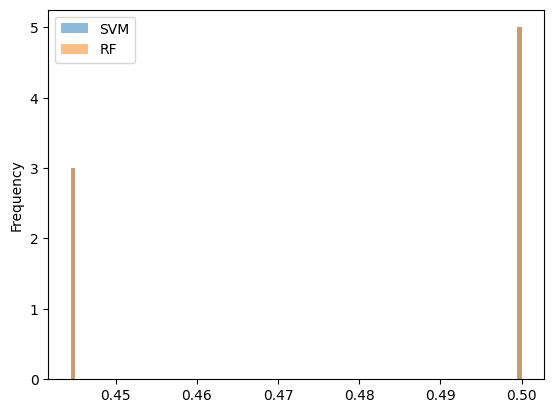

In [137]:
ax = results_all.plot.hist(bins=100, alpha=0.5)